# Stackoverflow Survey Data Analysis

Import required libs

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import numpy as np


style.use('seaborn')

Load Stackoverflow data

In [71]:
data = pd.read_csv('data/survey_results_public.csv')

# titanic = sns.load_dataset("titanic")

# titanic


Lets create some functions to help us count usages of a language. We should output how many stack overflow respondants use each language in the list.

In [72]:
langs = ['Python','JavaScript','Java','C#','Scala','Swift','Objective-C','Go','Rust','C++']
language_users = []

def count_for_lang(dataFrame, lang):
    count = 0
    for ww in dataFrame.LanguageWorkedWith:
        # print(ww)
        if lang in str(ww):
            count += 1
    return count

def handle_pair(pair):
    (total, chunk) = pair
    return (chunk/total) * 100

def get_percs(totals, chunks):
    return list(map(handle_pair, zip(totals, chunks)))

for lang in langs:
   count = count_for_lang(data, lang)
   language_users.append(count)

language_users

[36443, 59219, 70113, 27097, 3309, 5744, 4191, 7201, 2794, 20524]

Now we want to see the gender distributeion in percentage in each of the languages.

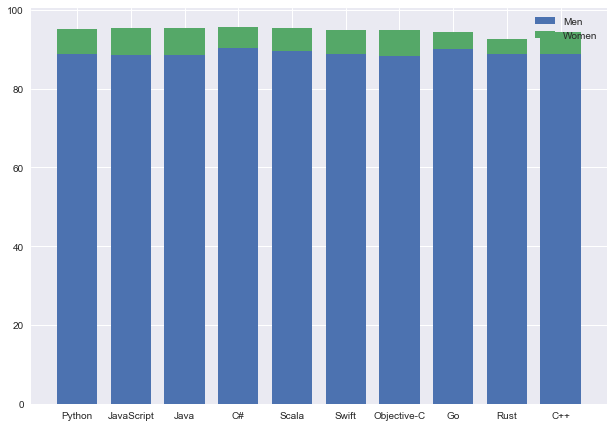

In [73]:
# Gather and plot Gender Data

dt_women  = data[data.Gender == 'Woman']
dt_men  = data[data.Gender == 'Man']


men = []
women = []
all_genders = []


for lang in langs:
   wc = count_for_lang(dt_women, lang) 
   women.append(wc)
   mc = count_for_lang(dt_men, lang)
   men.append(mc)
  

men_perc = get_percs(language_users,men)
women_perc = get_percs(language_users,women)

#draw bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# ax.bar(langs, women)
# ax.bar(langs, men)
width = 0.75

# print(langs)
# print(women)
# print(men)

ax.bar(langs, men_perc, width)
ax.bar(langs, women_perc, width,bottom=men_perc)
ax.legend(labels=['Men', 'Women'])
plt.show()



Now lets look at ethnic diversity across these language communities.


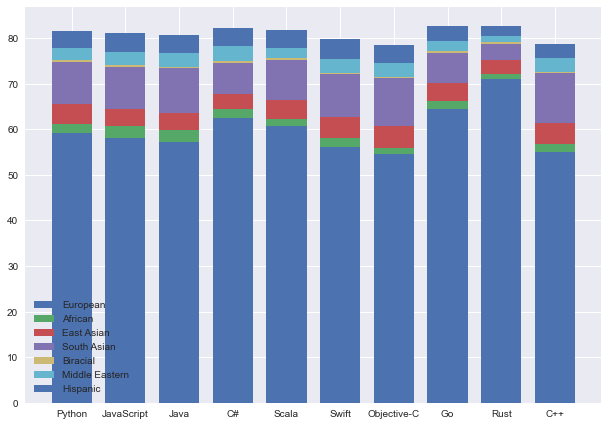

In [74]:
# Gather and plot entnicity data

european = data[data.Ethnicity == 'White or of European descent']
african = data[data.Ethnicity == 'Black or of African descent'] 
east_asian = data[data.Ethnicity == 'East Asian']
south_asian = data[data.Ethnicity == 'South Asian']
biracial = data[data.Ethnicity == 'Biracial']
middle_eastern = data[data.Ethnicity == 'Middle Eastern'] 
hispanic = data[data.Ethnicity == 'Hispanic or Latino/Latina']

european_c = []
african_c = []
east_asian_c = []
south_asian_c = []
biracial_c = []
middle_eastern_c = []
hispanic_c = []

for lang in langs:
   european_c.append(count_for_lang(european, lang))
   african_c.append(count_for_lang(african, lang))
   east_asian_c.append(count_for_lang(east_asian, lang))
   south_asian_c.append(count_for_lang(south_asian, lang))
   biracial_c.append(count_for_lang(biracial, lang))
   middle_eastern_c.append(count_for_lang(middle_eastern, lang))
   hispanic_c.append(count_for_lang(hispanic, lang))



european_p = get_percs(language_users, european_c)
african_p = get_percs(language_users, african_c)
east_asian_p = get_percs(language_users, east_asian_c)
south_asian_p = get_percs(language_users, south_asian_c)
biracial_p = get_percs(language_users, biracial_c)
middle_eastern_p = get_percs(language_users, middle_eastern_c)
hispanic_p = get_percs(language_users, hispanic_c)

#draw bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.75

ax.bar(langs, european_p, width) #euro
ax.bar(langs, african_p, width,bottom=european_p) #african
ax.bar(langs, east_asian_p, width,
    bottom=[european_p[j] + african_p[j] for j in range(len(european_p)) ]) # east asian
ax.bar(langs, south_asian_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] for j in range(len(european_p)) ]) #south asian
ax.bar(langs, biracial_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] + south_asian_p[j] for j in range(len(european_p)) ]) #biracial
ax.bar(langs, middle_eastern_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] + south_asian_p[j] + biracial_p[j] for j in range(len(european_p)) ]) #middle eastern
ax.bar(langs, hispanic_p, width,
    bottom=[european_p[j] + african_p[j] + east_asian_p[j] + south_asian_p[j] + biracial_p[j] + middle_eastern_p[j] for j in range(len(european_p)) ]) #hispanic
ax.legend(labels=['European', 'African','East Asian','South Asian','Biracial','Middle Eastern','Hispanic'])
plt.show()

